In [8]:
import cv2
import matplotlib.pyplot as plt
import sys
import pandas as pd
import os
import numpy as np

import video_extraction
import utils

In [9]:
import plotly.graph_objects as go
import plotly.express as px

from jupyter_dash import JupyterDash
from dash import html, dcc
from dash.dependencies import Input, Output

# Get frames

In [10]:
video_dir = '/Volumes/LaCie/video/'

start_end_by_file = {}

for filename in os.listdir(video_dir):
    if filename.startswith('.'):
        continue
        
    path = os.path.join(video_dir, filename)
    
    starttime = video_extraction.get_start_time(path)
    
    cap = cv2.VideoCapture(path)
    
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = frame_count/fps

    approx_endtime = starttime + duration
    
    start_end_by_file[filename] = (starttime, approx_endtime)

# GET POSITION DATA

In [11]:
# If you haven't saved the data, then you can load it in through:
# import combine_data
# data = combine_data.get_csv_and_navest()


# If you have the data saved, you can load it in faster through:
# data.to_csv('../data/test_data/csv_and_navest.csv', index=False)
data = pd.read_csv('../data/test_data/csv_and_navest.csv')

In [12]:
start_end_by_file

{'J2-1393_4k_20211121133649-20211121133659.mov': (1637501809.0,
  1637501819.4437666),
 'J2-1393_4k_20211121205638-20211121205639.mov': (1637528198.0,
  1637528199.6016),
 'J2-1393_4k_20211122134220-20211122134807.mov': (1637588540.0,
  1637588887.0800667),
 'J2-1393_4k_20211122135505-20211122140244.mov': (1637589305.0,
  1637589764.0586),
 'J2-1393_4k_20211122140522-20211122140700.mov': (1637589922.0,
  1637590020.1313667),
 'J2-1393_4k_20211122142139-20211122142247.mov': (1637590899.0,
  1637590967.4350333),
 'J2-1393_4k_20211122142701-20211122142848.mov': (1637591221.0,
  1637591328.107),
 'J2-1393_4k_20211122152635-20211122152904.mov': (1637594795.0,
  1637594944.5494),
 'J2-1393_4k_20211122161841-20211122172224.mov': (1637597921.0,
  1637601744.7866333),
 'J2-1393_4k_20211122174832-20211122175207.mov': (1637603312.0,
  1637603527.7155)}

In [23]:
def time_to_file(time, start_end_by_file=start_end_by_file, return_int=False):
    """Given a time, and a map from file to 
    start and end time, return which file
    time belongs in. (None if none)"""
    index = 0
    for file, (start, end) in start_end_by_file.items():
        index += 1
        if start <= time and time <= end:
            if return_int:
                return index
            return file
    return None

def get_image(file, seconds):
    cap = cv2.VideoCapture(os.path.join(video_dir, file))

    cap.set(cv2.CAP_PROP_POS_MSEC, seconds*1000)

    ret, frame = cap.read()
    
    if not ret:
        raise ValueError("Image not found")
    
    
#     CV2 seems to default to ordering the channels unusuall
#     This orders them as rgb
    return cv2.merge(cv2.split(frame))

In [30]:
class capture_holder():
    def __init__(self):
        self.cap = None
        self.file = None
        
    def __call__(self, file):
        if file = self.file:
            return self.cap
        else:
            self.file = file
            self.cap = cv2.VideoCapture(os.path.join(video_dir, file))
        

# TODO

- Speedup
    - Can we use a closure to not load more than necesarry?
- Add Mesh
- Add other points

# DASH PLOT

In [15]:
data['color'] = data.unix_time.apply(time_to_file, return_int=True)

data['video_file'] = data.unix_time.apply(time_to_file)

mesh = utils.get_mesh(utils.MESH_PATH, 1000)

mesh.hoverinfo = "skip"

In [16]:
# fig = go.Figure(data=[go.Scatter3d(
#     x=data[pd.notna(data.video_file)].northing,
#     y=data[pd.notna(data.video_file)].easting,
#     z=data[pd.notna(data.video_file)].depth,
#     text = data.unix_time,#data[pd.notna(data.video_file)].text,
#     mode='markers',
#     marker=dict(
#         color=data[pd.notna(data.video_file)].color
#     ),
#     customdata = np.dstack((data.video_file, data.unix_time))
# )])

# fig

In [20]:
fig = px.scatter_3d(
    data[pd.notna(data.video_file)],
    x='northing',
    y='easting', 
    z='depth',
    color='color',
    custom_data=['video_file', 'unix_time'],
    hover_data=dict(
        unix_time = True,
        video_file = True
    )
)

In [138]:
fig

{'points': [{'x': 432694.42117455066, 'y': 3042720.2227858086, 'z': -1728.422, 'curveNumber': 0, 'pointNumber': 1237, 'marker.color': 9, 'bbox': {'x0': 771.904728745618, 'x1': 771.904728745618, 'y0': 661.1381193113666, 'y1': 661.1381193113666}, 'customdata': ['J2-1393_4k_20211122161841-20211122172224.mov', 1637597929.441]}]}
{'points': [{'x': 432694.41654634185, 'y': 3042724.235084735, 'z': -1728.306, 'curveNumber': 0, 'pointNumber': 1259, 'marker.color': 9, 'bbox': {'x0': 760.1952077536818, 'x1': 760.1952077536818, 'y0': 646.0376196537466, 'y1': 646.0376196537466}, 'customdata': ['J2-1393_4k_20211122161841-20211122172224.mov', 1637597951.441]}]}
{'points': [{'x': 432694.4237891678, 'y': 3042724.834338148, 'z': -1728.237, 'curveNumber': 0, 'pointNumber': 1262, 'marker.color': 9, 'bbox': {'x0': 758.3907902734924, 'x1': 758.3907902734924, 'y0': 632.3795108503787, 'y1': 632.3795108503787}, 'customdata': ['J2-1393_4k_20211122161841-20211122172224.mov', 1637597954.441]}]}
{'points': [{'x': 

In [24]:
app = JupyterDash(__name__)



app.layout = html.Div(children=[
    dcc.Input(value=0, id='frame_selector'),
    dcc.Graph(id='camera'),
    dcc.Graph(id = 'spatial', figure=fig)
    
])


# @app.callback(
#     Output(component_id = 'camera', component_property='figure'),
#     Input(component_id = 'frame_selector', component_property='value')
# )
# def jump_camera(timestamp):
#     timestamp = float(timestamp)
#     fig = px.imshow(im_by_time[timestamp])

#     return fig
    
    
    
@app.callback(
    Output(component_id = 'camera', component_property='figure'),
    Input('spatial', 'clickData')
)
def set_camera(node_clicked):
    custom_data = node_clicked['points'][0]['customdata']
    timestamp = custom_data[1]
    start = start_end_by_file[custom_data[0]][0]
    seek_dist = timestamp - start
    return px.imshow(get_image(custom_data[0], seek_dist))
    
    
#     return px.imshow(im_by_time[timestamp])
#     return px.imshow(video_extraction.decompress_image(im_by_time[timestamp]))


@app.callback(
    Output(component_id = 'frame_selector', component_property='value'),
    Input('spatial', 'clickData')
)
def set_frame(node_clicked):
    print(node_clicked)
    return node_clicked['points'][0]['customdata'][1]
    
    

app.run_server()

Dash app running on http://127.0.0.1:8050/
None
{'points': [{'x': 432718.8969440218, 'y': 3042715.475683667, 'z': -1726.359, 'curveNumber': 0, 'pointNumber': 5015, 'marker.color': 9, 'bbox': {'x0': 835.986337273376, 'x1': 835.986337273376, 'y0': 622.8928454788613, 'y1': 622.8928454788613}, 'customdata': ['J2-1393_4k_20211122161841-20211122172224.mov', 1637601707.441]}]}
{'points': [{'x': 432694.6771165094, 'y': 3042727.7961800294, 'z': -1728.043, 'curveNumber': 0, 'pointNumber': 1276, 'marker.color': 9, 'bbox': {'x0': 698.7716140093306, 'x1': 698.7716140093306, 'y0': 630.5449276982466, 'y1': 630.5449276982466}, 'customdata': ['J2-1393_4k_20211122161841-20211122172224.mov', 1637597968.441]}]}
{'points': [{'x': 432694.5078505762, 'y': 3042726.2916764705, 'z': -1728.039, 'curveNumber': 0, 'pointNumber': 1269, 'marker.color': 9, 'bbox': {'x0': 704.8206503925193, 'x1': 704.8206503925193, 'y0': 628.8864236594384, 'y1': 628.8864236594384}, 'customdata': ['J2-1393_4k_20211122161841-20211122172

In [93]:
dcc.Graph(id='camera')

Graph(id='camera')

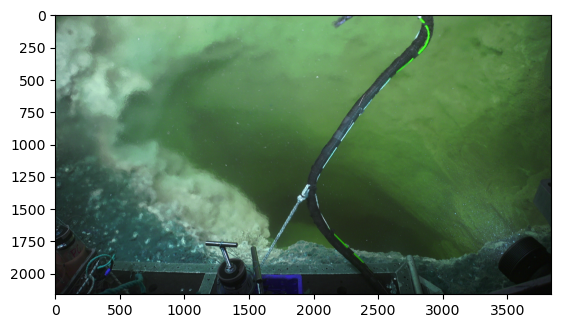

In [8]:
plt.imshow(curr_frame)
plt.show()

In [79]:
import scipy.linalg
import numpy as np

from collections import namedtuple

Image = namedtuple('Image', ['ru', 'rs', 'rv', 'gu', 'gs', 'gv', 'bu', 'bs', 'bv'])

def compress_channel(channel, modes=50):
    U, S, V = scipy.linalg.svd(channel)
    return (U[:, :modes], S[:modes], V[:modes])
    
def compress_frame(frame):
    red_channel = curr_frame[:, :, 0].reshape(len(curr_frame), -1)
    green_channel = curr_frame[:, :, 1].reshape(len(curr_frame), -1)
    blue_channel = curr_frame[:, :, 2].reshape(len(curr_frame), -1)
    
    ru, rs, rv = compress_channel(red_channel)
    gu, gs, gv = compress_channel(green_channel)
    bu, bs, bv = compress_channel(blue_channel)
    
    return Image(ru, rs, rv, gu, gs, gv, bu, bs, bv)

def decompress_image(image):
    height = len(image.ru)
    width = len(image.rv[0, :])
    reconstruction = np.zeros((height, width, 3))
    reconstruction[:, :, 0] = image.ru@np.diag(image.rs)@image.rv
    reconstruction[:, :, 1] = image.gu@np.diag(image.gs)@image.gv
    reconstruction[:, :, 2] = image.bu@np.diag(image.bs)@image.bv
    return reconstruction.astype('uint8')

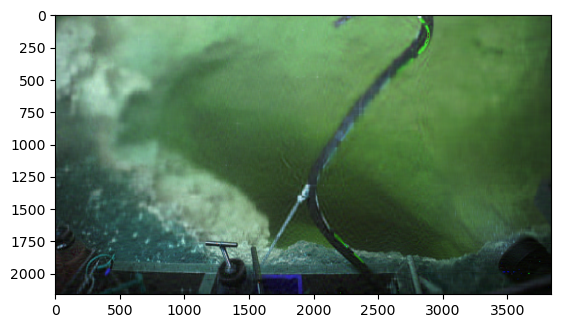

In [117]:
plt.imshow(decompress_image(compress_frame(curr_frame)))
plt.show()

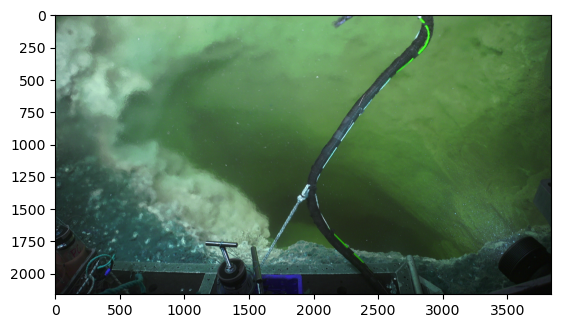

In [118]:
plt.imshow(curr_frame)
plt.show()

In [111]:
curr_frame.shape

(2160, 3840, 3)

In [127]:
compressed_frame = decompress_image(compress_frame(curr_frame))

In [112]:
compressed_frame.shape

(2160, 3840, 3)

In [131]:
compression =compress_frame(curr_frame)

In [132]:
sys.getsizeof(compression)

128

In [129]:
sys.getsizeof(compressed_frame)

24883328

In [130]:
sys.getsizeof(curr_frame)

24883328

In [122]:
curr_frame

array([[[61, 76, 61],
        [65, 80, 65],
        [61, 80, 65],
        ...,
        [55, 89, 44],
        [56, 88, 39],
        [56, 88, 39]],

       [[64, 79, 64],
        [63, 78, 63],
        [58, 76, 60],
        ...,
        [53, 88, 43],
        [57, 91, 42],
        [61, 95, 46]],

       [[52, 68, 54],
        [60, 76, 62],
        [63, 79, 64],
        ...,
        [52, 89, 44],
        [55, 90, 44],
        [59, 94, 48]],

       ...,

       [[16, 13,  6],
        [22, 19, 12],
        [24, 22, 15],
        ...,
        [ 4,  6,  4],
        [ 4,  7,  4],
        [ 4,  7,  4]],

       [[18, 16, 10],
        [23, 20, 15],
        [24, 22, 16],
        ...,
        [ 4,  6,  5],
        [ 8, 11,  8],
        [ 9, 12,  9]],

       [[20, 17, 15],
        [22, 18, 16],
        [22, 18, 16],
        ...,
        [ 6,  9,  8],
        [11, 13, 12],
        [13, 16, 15]]], dtype=uint8)

In [30]:
blue_channel = curr_frame[:, :, 0].reshape(len(curr_frame), -1)

In [82]:
U, S, V = scipy.linalg.svd(blue_channel)

In [41]:
len(S)

2160

In [42]:
S_prime = S[:50]

In [44]:
U.shape

(2160, 2160)

In [45]:
S.shape

(2160,)

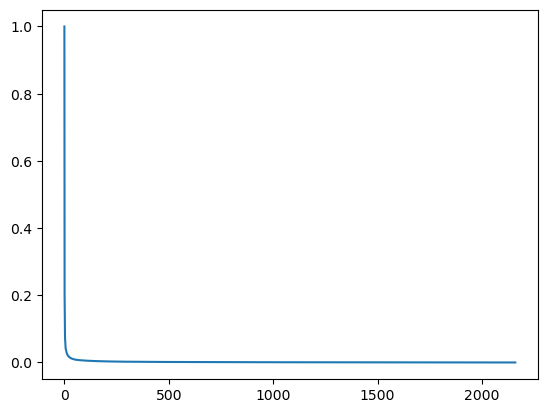

In [37]:
plt.plot(S/max(S))
plt.show()

In [67]:
compressed_blue_channel = U[:, :50]@np.diag(S_prime)@V[:50]

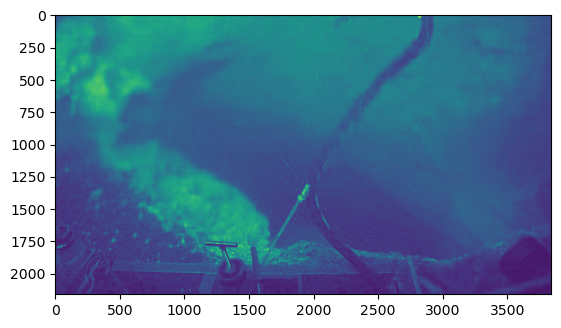

In [68]:
plt.imshow(compressed_blue_channel)
plt.show()

In [70]:
blue_channel.shape

(2160, 3840)

In [71]:
2160*3840

8294400